AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [1]:
import pandas as pd

df = pd.read_csv('diabetic_data.csv')

variance_num_med_proc = df['num_med_proc'].var()
standard_deviation_num_med_proc = df['num_med_proc'].std()
print("Variance of num_med_proc:", variance_num_med_proc)
print("Standard Deviation of num_med_proc:", standard_deviation_num_med_proc)

covariance_num_med_proc_time_in_hospital = df[['num_med_proc', 'time_in_hospital']].cov().iloc[0, 1]

print("Covariance between num_med_proc and time_in_hospital:", covariance_num_med_proc_time_in_hospital)
correlation_num_med_proc_time_in_hospital = df[['num_med_proc', 'time_in_hospital']].corr().iloc[0, 1]
print("Correlation between num_med_proc and time_in_hospital:", correlation_num_med_proc_time_in_hospital)


Variance of num_med_proc: 556.7456310006831
Standard Deviation of num_med_proc: 23.595457846812025
Covariance between num_med_proc and time_in_hospital: 30.98368242457841
Correlation between num_med_proc and time_in_hospital: 0.4396152794861987


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

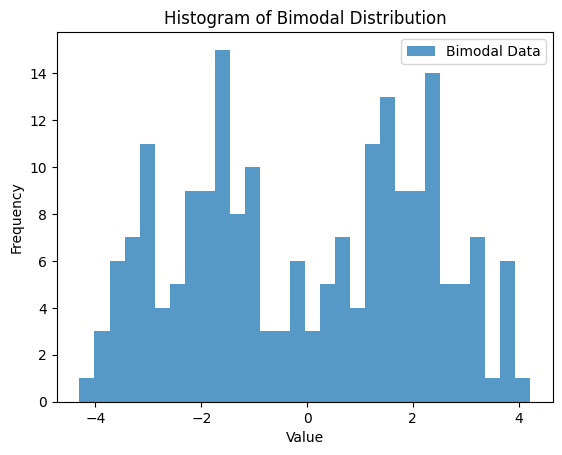

Kurtosis: -1.253171130450326
Skewness: -0.016303987867885825


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(42)  
data1 = np.random.normal(loc=2, scale=1.2, size=100)
data2 = np.random.normal(loc=-2, scale=1.2, size=100)


combined_data = np.concatenate((data1, data2))

plt.hist(combined_data, bins=30, alpha=0.75, label='Bimodal Data')
plt.title('Histogram of Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

kurt = kurtosis(combined_data)
skw = skew(combined_data)
print("Kurtosis:", kurt)
print("Skewness:", skw)

AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

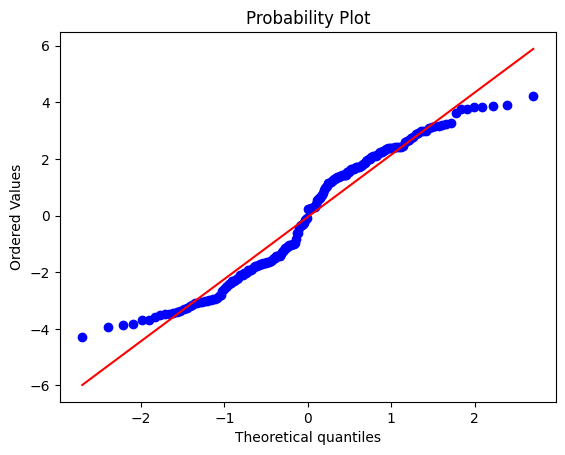

Shapiro-Wilk: ShapiroResult(statistic=0.9502894878387451, pvalue=2.0122954538237536e-06)
Anderson-Darling: AndersonResult(statistic=3.5037771585172663, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [3]:
from scipy.stats import shapiro, anderson, probplot
fig, ax = plt.subplots()
probplot(combined_data, dist="norm", plot=ax)
plt.show()

shapiro_wilk_test = shapiro(combined_data)
print("Shapiro-Wilk:", shapiro_wilk_test)

anderson_darling_test = anderson(combined_data)
print("Anderson-Darling:", anderson_darling_test)

AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

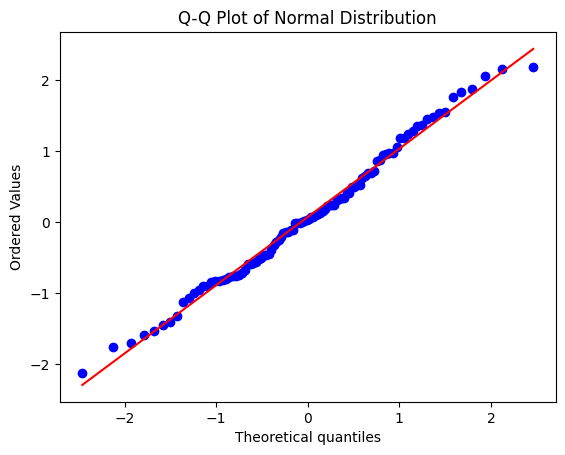

Shapiro-Wilk Test (Normal Data): W=0.99, p-value=0.5608
Anderson-Darling Test (Normal Data): Statistic=0.31, critical_values=[0.555 0.632 0.759 0.885 1.053], significance_levels=[15.  10.   5.   2.5  1. ]
Shapiro-Wilk Test (Reduced Normal Data): W=0.98, p-value=0.7963
Anderson-Darling Test (Reduced Normal Data): Statistic=0.20, critical_values=[0.521 0.593 0.712 0.83  0.988], significance_levels=[15.  10.   5.   2.5  1. ]


In [6]:

normal_data = np.random.normal(loc=0, scale=1, size=100)
probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Normal Distribution")
plt.show()

shapiro_test_normal = shapiro(normal_data)
anderson_test_normal = anderson(normal_data)
print(f"Shapiro-Wilk Test (Normal Data): W={shapiro_test_normal[0]:.2f}, p-value={shapiro_test_normal[1]:.4f}")
print(f"Anderson-Darling Test (Normal Data): Statistic={anderson_test_normal.statistic:.2f}, critical_values={anderson_test_normal.critical_values}, significance_levels={anderson_test_normal.significance_level}")

reduced_normal_data = np.random.normal(loc=0, scale=1, size=30)
shapiro_test_reduced = shapiro(reduced_normal_data)
anderson_test_reduced = anderson(reduced_normal_data)
print(f"Shapiro-Wilk Test (Reduced Normal Data): W={shapiro_test_reduced[0]:.2f}, p-value={shapiro_test_reduced[1]:.4f}")
print(f"Anderson-Darling Test (Reduced Normal Data): Statistic={anderson_test_reduced.statistic:.2f}, critical_values={anderson_test_reduced.critical_values}, significance_levels={anderson_test_reduced.significance_level}")

AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

Distinct groups: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


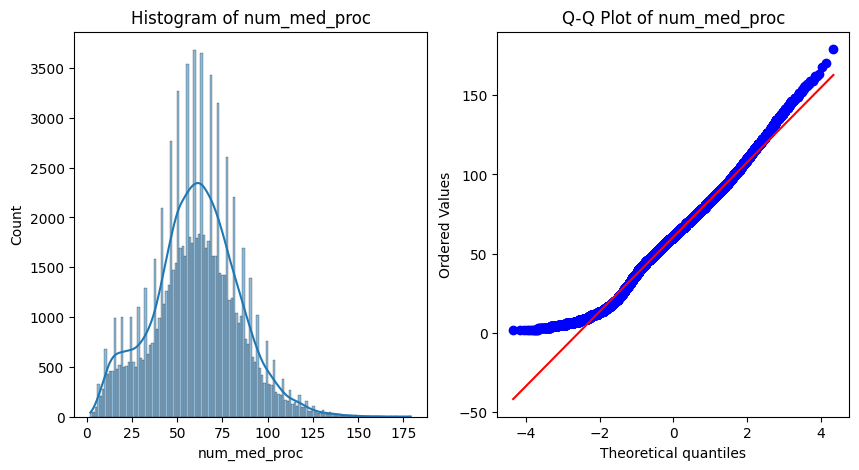

Anderson-Darling test result: AndersonResult(statistic=96.61245024697564, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


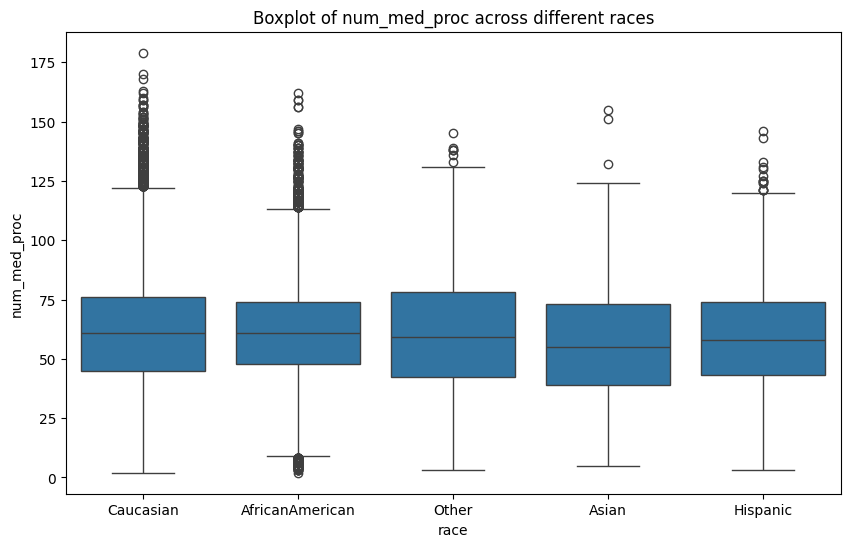

ANOVA F-value: 12.454717826440142
ANOVA P-value: 3.9621065489336674e-10
Kruskal-Wallis H-value: 52.17798202426288
Kruskal-Wallis P-value: 1.2661582646035497e-10
ANOVA suggests there is a significant difference in the number of medications and procedures across different races.
Kruskal-Wallis suggests there is a significant difference in the number of medications and procedures across different races.


In [7]:
from scipy.stats import kruskal
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
data = pd.read_csv('diabetic_data.csv')

# 2. Find unique values under 'race' column
distinct_groups = data['race'].unique()
print("Distinct groups:", distinct_groups)

# 3. Visualize the continuous variable using histogram and Q-Q plot
plt.figure(figsize=(10,5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['num_med_proc'], kde=True)
plt.title('Histogram of num_med_proc')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(data['num_med_proc'], dist="norm", plot=plt)
plt.title('Q-Q Plot of num_med_proc')
plt.show()

# 4. Anderson-Darling test for normality
ad_result = stats.anderson(data['num_med_proc'])
print("Anderson-Darling test result:", ad_result)

# 5. Boxplot visualization
plt.figure(figsize=(10,6))
sns.boxplot(x='race', y='num_med_proc', data=data)
plt.title('Boxplot of num_med_proc across different races')
plt.show()

# 6. ANOVA Test
# Null Hypothesis (H0): There is no difference in the number of medications and procedures across different races.
# Alternative Hypothesis (Ha): There is a difference in the number of medications and procedures across different races.
f_val, p_val = stats.f_oneway(*[data[data['race'] == group]['num_med_proc'] for group in distinct_groups])
print("ANOVA F-value:", f_val)
print("ANOVA P-value:", p_val)

# 7. Kruskal-Wallis Test
h_val, p_val_kw = stats.kruskal(*[data[data['race'] == group]['num_med_proc'] for group in distinct_groups])
print("Kruskal-Wallis H-value:", h_val)
print("Kruskal-Wallis P-value:", p_val_kw)

# 8. Conclusion based on results
if p_val < 0.05:
    print("ANOVA suggests there is a significant difference in the number of medications and procedures across different races.")
else:
    print("ANOVA suggests there is no significant difference in the number of medications and procedures across different races.")

if p_val_kw < 0.05:
    print("Kruskal-Wallis suggests there is a significant difference in the number of medications and procedures across different races.")
else:
    print("Kruskal-Wallis suggests there is no significant difference in the number of medications and procedures across different races.")


